In [1]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b9695b932d7554933efe0f315299955692326a61f793b9233c58fa21cbab243c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [2]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
import os
import gensim.corpora as corpora
from wordcloud import WordCloud, STOPWORDS
from pprint import pprint
import pickle
import pyLDAvis.gensim_models
import pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [4]:
reviews = pd.read_csv("preprocessed_reviews.csv")
reviews.head()

,hotel,user,reviewed_date,visit_date,rating,title,text
0,ad Imperial Palace Hotel Thessaloniki,tehgr3g,"March 28, 2022",March 2022,5.0,Excellent Stay in Thessaloniki Center !,"best,value,money,hotel,heart,top,spot,biggest,..."
1,ad Imperial Palace Hotel Thessaloniki,gopalakrishnank769,"December 5, 2021",December 2021,4.0,Good hotel with professional staff,"ad,imperial,palace,hotel,location,almost,perfe..."
2,ad Imperial Palace Hotel Thessaloniki,TasosAnth,"November 17, 2021",November 2021,3.0,Palace only in the lobby,"hotel,near,center,everything,walkable,distance..."
3,ad Imperial Palace Hotel Thessaloniki,ADtrip27,"November 6, 2021",November 2021,3.0,Old-fashioned hotel,"spent,one,night,hotel,ideally,next,restaurant,..."
4,ad Imperial Palace Hotel Thessaloniki,Alex J,"March 17, 2020",April 2019,4.0,A reasonably good hotel,"group,tour,large,group,people,hotel,chosen,tou..."


In [ ]:
#Data cleaning and visualization of most common words

In [5]:
reviews = reviews.drop(columns=['hotel', 'user', 'reviewed_date', 'visit_date', 'rating', 'title'], axis=1).sample(100)
reviews.head()

,text
5737,"hotel,large,room,taken,care,attentive,staff,fo..."
2984,"thank,much,great,pleasure,coma,back,soon,best,..."
6272,"stayed,night,clean,room,good,position,could,go..."
10556,"love,hotel,location,unique,several,minute,city..."
8633,"day,stay,palace,hotel,business,purpose,complim..."


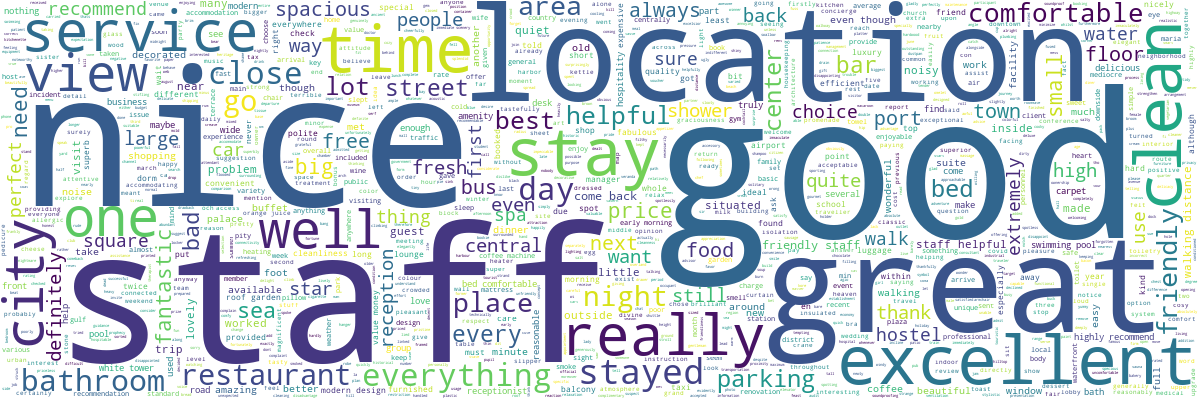

In [6]:
stop_words = ['hotel', 'room', 'breakfast'] + list(STOPWORDS)
wordcloud = WordCloud(width=1200, height=400, stopwords=stop_words, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
long_string = ','.join(list(reviews['text'].values))
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
#Prepare data for LDA Analysis

In [27]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'hotel', 'room', 'staff', 'nice', 'good'])

In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
      
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [29]:
data = reviews.text.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['large', 'taken', 'care', 'attentive', 'food', 'restaurant', 'bad', 'though', 'location', 'furthermore', 'area', 'around', 'slowly', 'moreover', 'walking', 'distance', 'form', 'anything', 'interesting', 'swimming', 'pool', 'forget', 'harbor', 'view', 'view', 'port', 'area', 'least', 'window']


In [30]:
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1)]


In [31]:
#LDA model training

In [32]:
#Number of topics and LDA model building
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [33]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"location" + 0.013*"breakfast" + 0.012*"clean" + 0.011*"close" + '
  '0.010*"want" + 0.010*"service" + 0.010*"friendly" + 0.010*"area" + '
  '0.009*"also" + 0.009*"city"'),
 (1,
  '0.018*"breakfast" + 0.014*"clean" + 0.014*"go" + 0.011*"great" + '
  '0.010*"location" + 0.010*"floor" + 0.009*"stayed" + 0.008*"excellent" + '
  '0.008*"fantastic" + 0.008*"service"'),
 (2,
  '0.022*"excellent" + 0.019*"breakfast" + 0.013*"great" + 0.013*"would" + '
  '0.011*"comfortable" + 0.011*"restaurant" + 0.010*"location" + '
  '0.009*"helpful" + 0.009*"time" + 0.009*"really"'),
 (3,
  '0.014*"service" + 0.011*"thank" + 0.011*"everything" + 0.011*"back" + '
  '0.010*"location" + 0.009*"great" + 0.009*"breakfast" + 0.009*"price" + '
  '0.009*"quite" + 0.009*"wonderful"'),
 (4,
  '0.015*"location" + 0.013*"also" + 0.012*"view" + 0.010*"bathroom" + '
  '0.009*"amazing" + 0.007*"really" + 0.007*"lot" + 0.007*"water" + '
  '0.007*"roof" + 0.007*"full"'),
 (5,
  '0.022*"great" + 0.013*"well" +

In [34]:
#Analyzing LDA's results -Topics visualization

In [35]:
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.003941 -0.020141       1        1  22.085827
2      0.005600 -0.089769       2        1  12.246933
6      0.012508 -0.040141       3        1  10.016286
1     -0.034489  0.019351       4        1   9.487609
9      0.114644  0.036857       5        1   9.387421
8      0.012305  0.023317       6        1   7.728501
4     -0.010126 -0.027121       7        1   7.491496
0      0.020540  0.002421       8        1   7.481878
3     -0.097897  0.018042       9        1   7.060268
7     -0.019144  0.077183      10        1   7.013781, topic_info=          Term       Freq      Total Category  logprob  loglift
127  excellent  25.000000  25.000000  Default  30.0000  30.0000
35       thank   6.000000   6.000000  Default  29.0000  29.0000
45          go  13.000000  13.000000  Default  28.0000  28.0000
180  wonderful   4.000000   4.000000  Default  27.0000  27.0000
269    service  20.000000  20.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
52        time   1.422494  24.923349  Topic10  -5.1118  -0.2061
55        city   1.352080  21.331358  Topic10  -5.1625  -0.1012
30       great   1.313501  36.671649  Topic10  -5.1915  -0.6720
95        stay   1.260508  24.473104  Topic10  -5.2327  -0.3088
80    friendly   1.208271  20.083527  Topic10  -5.2750  -0.1534

[671 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
252       8  0.760186   absolute
804       9  0.710030   abundant
805       9  0.709134  accessory
501       5  0.664911   actually
736       6  0.700933      added
...     ...       ...        ...
169       7  0.042918      would
169       8  0.085836      would
169       9  0.042918      would
169      10  0.085836      would
728       6  0.701138      wrong

[1120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 7, 2, 10, 9, 5, 1, 4, 8])